# Logistic Regression

Predicting result: cash rate will decreases in September 2024

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # SMOTE for handling class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive (if necessary)
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Load the dataset 
file_path = 'https://raw.githubusercontent.com/AS2357/ML-project/refs/heads/main/data/ADA%20Final%20Project.xlsx%20-%20Sheet1.csv'
df = pd.read_csv(file_path)


# Check the first few rows to understand the data structure
df.head()


# Fill missing values with column means
df.fillna(0, inplace=True)



In [ ]:
print(df)

          time  cash_rate_target  inflation_rate      CPI  unemployment_rate  \
0   1999-03-01              4.75        2.789154  164.800               14.4   
1   1999-04-01              4.75        2.796338  165.900               13.4   
2   1999-05-01              4.75        2.849033  166.000               13.3   
3   1999-06-01              4.75        2.937107  166.000               12.2   
4   1999-07-01              4.75        3.010550  166.700               11.4   
..         ...               ...             ...      ...                ...   
301 2024-04-01              4.35        2.342961  313.207                9.9   
302 2024-05-01              4.35        2.451501  313.225                9.5   
303 2024-06-01              4.35        2.367064  313.049                8.9   
304 2024-07-01              4.35        2.368186  313.534                9.4   
305 2024-08-01              4.35        2.164069  314.121                0.0   

     hourly_wage_growth  Bank_Prime_Loa

Class distribution in target variable 'cash_rate_target':
cash_rate_target
4.75    35
1.50    33
2.50    17
0.10    17
5.25    14
        ..
5.23     1
3.27     1
3.03     1
2.80     1
4.29     1
Name: count, Length: 91, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06185298636807346, tolerance: 0.06034478993589744
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06774191851645739, tolerance: 0.06034478993589744
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06664906456898478, tolerance: 0.06034478993589744
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Co

Training set class distribution:
Cash_rate_class_fitted_numeric
-1    72
 0    63
 1    61
Name: count, dtype: int64
Test set class distribution:
Cash_rate_class_fitted_numeric
 1    18
-1    17
 0    15
Name: count, dtype: int64
Applied SMOTE to handle class imbalance.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy on Test Data: 0.52
Confusion Matrix:
[[ 9  3  5]
 [ 4 10  1]
 [ 6  5  7]]


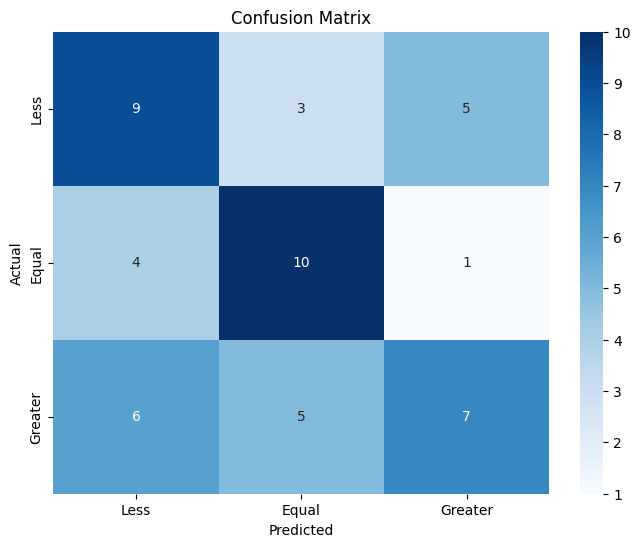

              precision    recall  f1-score   support

        Less       0.47      0.53      0.50        17
       Equal       0.56      0.67      0.61        15
     Greater       0.54      0.39      0.45        18

    accuracy                           0.52        50
   macro avg       0.52      0.53      0.52        50
weighted avg       0.52      0.52      0.51        50

One-step-ahead forecast: Less


In [ ]:
# Check class distribution in the target variable
print("Class distribution in target variable 'cash_rate_target':")
print(df['cash_rate_target'].value_counts())

# Remove classes that have less than 2 observations
min_samples = 2  # Threshold for minimum number of samples per class
value_counts = df['cash_rate_target'].value_counts()

# Filter out rows where the class has less than 2 occurrences
valid_classes = value_counts[value_counts >= min_samples].index
df_filtered = df[df['cash_rate_target'].isin(valid_classes)]

# Redefine X and y after filtering
X = df_filtered.drop(columns=['cash_rate_target', 'time'])
y = df_filtered['cash_rate_target']

# Step 1: Stratified split to ensure balanced class distribution between training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a regression model (LassoCV) to get fitted values for 'cash_rate_target'
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get the fitted values (predictions) from the regression model
fitted_values_train = lasso.predict(X_train_scaled)
fitted_values_test = lasso.predict(X_test_scaled)

# Define a tolerance and categorize based on fitted values
tolerance = 0.125  # Adjust this value as needed

def categorize_prediction(actual, fitted, tolerance=0.125):
    """Categorize the actual value based on the fitted value."""
    if abs(actual - fitted) < tolerance:
        return 'Equal'
    elif fitted < actual :
        return 'Less'
    else:
        return 'Greater'

# Apply categorization based on fitted values to the training and test sets
df_train = pd.DataFrame({'actual': y_train, 'fitted': fitted_values_train})
df_train['Cash_rate_class_fitted'] = df_train.apply(lambda row: categorize_prediction(row['actual'], row['fitted'], tolerance), axis=1)

df_test = pd.DataFrame({'actual': y_test, 'fitted': fitted_values_test})
df_test['Cash_rate_class_fitted'] = df_test.apply(lambda row: categorize_prediction(row['actual'], row['fitted'], tolerance), axis=1)

# Map the new categorical labels to numeric values
label_mapping_fitted = {'Less': -1, 'Equal': 0, 'Greater': 1}
df_train['Cash_rate_class_fitted_numeric'] = df_train['Cash_rate_class_fitted'].map(label_mapping_fitted)
df_test['Cash_rate_class_fitted_numeric'] = df_test['Cash_rate_class_fitted'].map(label_mapping_fitted)

# Check class distribution in the training set
print("Training set class distribution:")
print(df_train['Cash_rate_class_fitted_numeric'].value_counts())

# Check class distribution in the test set
print("Test set class distribution:")
print(df_test['Cash_rate_class_fitted_numeric'].value_counts())

# Prepare features (X) and the new target (y) for classification using the fitted categories
X_train_class = X_train_scaled
y_train_class = df_train['Cash_rate_class_fitted_numeric']

X_test_class = X_test_scaled
y_test_class = df_test['Cash_rate_class_fitted_numeric']

# Step 2: Handle class imbalance with SMOTE (optional)
# Check if there is more than one class in the training set before applying SMOTE
if len(np.unique(y_train_class)) > 1:
    smote = SMOTE(random_state=42)
    X_train_class_resampled, y_train_class_resampled = smote.fit_resample(X_train_class, y_train_class)
    print("Applied SMOTE to handle class imbalance.")
else:
    # If there's only one class, skip SMOTE and use the original data
    X_train_class_resampled = X_train_class
    y_train_class_resampled = y_train_class
    print("Skipped SMOTE because the training set contains only one class.")

# Step 3: Ensure the training set has more than one class before fitting logistic regression
if len(np.unique(y_train_class_resampled)) > 1:
    # Fit a Logistic Regression model with cross-validation (multinomial logistic regression)
    logistic_cv = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', multi_class='multinomial', Cs=10, random_state=42)
    logistic_cv.fit(X_train_class_resampled, y_train_class_resampled)

    # Step 4: Make predictions on the test set
    y_pred_class = logistic_cv.predict(X_test_class)

    # Evaluate the classification model
    accuracy = accuracy_score(y_test_class, y_pred_class)
    conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=[-1, 0, 1])

    print("Accuracy on Test Data:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualization of the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    class_names = ['Less', 'Equal', 'Greater']
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report for more detailed metrics
    print(classification_report(y_test_class, y_pred_class, target_names=class_names))

    # Step 5: Forecast the next step using the last row of X_test_scaled
    X_last_observation = X_test_class[-1].reshape(1, -1)  # Take the last row (features) of the test set
    next_step_prediction = logistic_cv.predict(X_last_observation)

    # Convert the numeric prediction back to the categorical label for easier interpretation
    reverse_label_mapping = {1: 'Greater', 0: 'Equal', -1: 'Less'}
    forecasted_category = reverse_label_mapping[next_step_prediction[0]]

    # Output the one-step-ahead forecast
    print(f"One-step-ahead forecast: {forecasted_category}")
else:
    print("Skipped Logistic Regression because the training set contains only one class.")
